# Clustering the iris dataset using different algorithms

In [321]:
#check working directory
import os 
os.getcwd()

'/Users/kristinpredeck/Documents/IBM/IBM ML'

In [322]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris

In [323]:
#import codes for plots
import sklearn.cluster as cluster
import time
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [324]:
#load dataset
dataset=load_iris()
data=pd.DataFrame(dataset['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
data['Species']=dataset['target']
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [325]:
#check types and check for NaN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [326]:
#check values in target variable
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [327]:
#convert to numberical values
data['Species'].replace(to_replace=['setosa','versicolor', 'virginica'], value=[0,1,3],inplace=True)

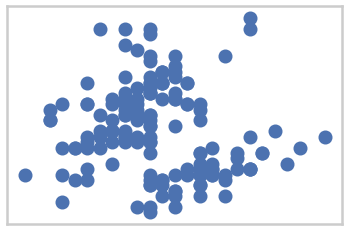

In [328]:
#plot petal width against petal length to look at data distribution 
plt.scatter(data['Petal Width'], data['Petal length'])
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

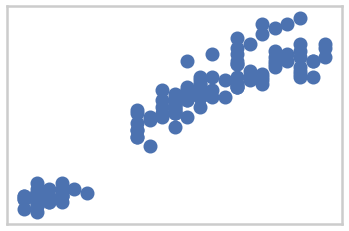

In [359]:
#plot sepal width against sepal length to look at data distribution 
plt.scatter(data['Sepal Width'], data['Sepal Length'])
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [329]:
#define x variable
x = data.iloc[:, [0,1,2,3]].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Start with a simple k-means clustering

In [330]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 3 4 1 1 4 2 4 1 4 1
 1 1 3 1 1 1 4 4 3 1 3 4 3 1 4 3 3 1 4 4 4 1 3 3 4 1 1 3 1 1 1 3 1 1 1 3 1
 1 3]


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

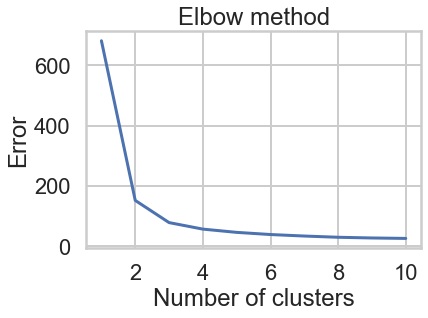

In [331]:
#use elbow method to determin best n for k
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

In [332]:
#build k-means with k=3
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

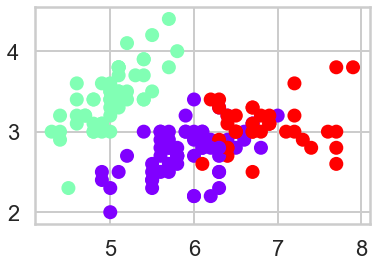

In [333]:
#plot clustering 
plt.scatter(x[:,0], x[:,1], c = y_kmeans3, cmap = 'rainbow')

## Use k-nearest neighbor to check accuracy score

In [334]:
#determine accuracy 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In [335]:
from sklearn.neighbors import KNeighborsClassifier
k = 3

#train model and predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [336]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 0, 3, 3, 3])

In [337]:
#accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.975
Test set Accuracy:  0.9666666666666667


In [ ]:
#accuracy with k=3 is pretty good!

## Take a quick look at the distribution of the actual data

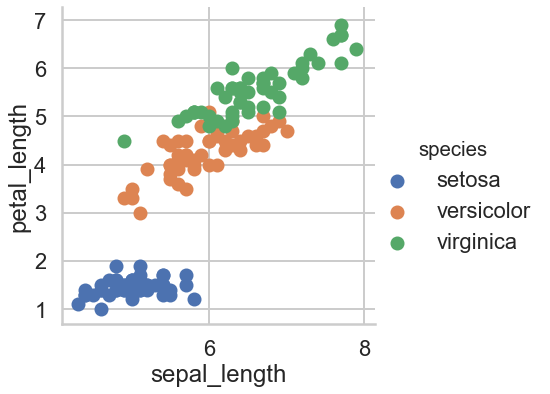

In [338]:
#scatterplot with real data to compare distributions by sepal length and petal length
import seaborn as sns 
  
iris = sns.load_dataset('iris') 
  
# style of graph  
sns.set_style("whitegrid") 
  
# scatterplot 
sns.FacetGrid(iris, hue ="species", height = 6).map(plt.scatter,'sepal_length', 'petal_length').add_legend() 

## DBSCAN

In [339]:
import sklearn
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [340]:
#initialize params 
dbscan = DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean', metric_params=None, min_samples=3, n_jobs=None, p=None)

In [341]:
#fit model
scan = dbscan.fit(x)

In [342]:
#show cluster labels 
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  3, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  3,
        1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [343]:
db_cluster = DBSCAN(eps=0.5, min_samples=2, algorithm='ball_tree', metric='minkowski', leaf_size=90, p=2)
arr = db_cluster.fit_predict(data)
print("Clusters assigned are:", set(db_cluster.labels_))

uni, counts = np.unique(arr, return_counts=True)
d = dict(zip(uni, counts))
print(d)

Clusters assigned are: {0, 1, 2, 3, 4, 5, 6, -1}
{-1: 7, 0: 49, 1: 44, 2: 4, 3: 2, 4: 39, 5: 3, 6: 2}


In [344]:
#build predictor model
scan_mod = scan.fit_predict(x)
print(scan_mod)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  3 -1  1 -1 -1  1  1  1  1  1  1  1 -1  3  1
  1  1  3  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


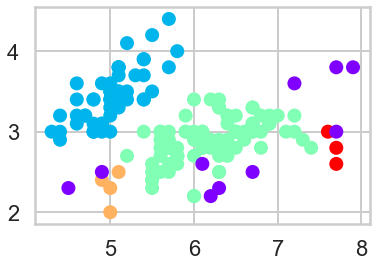

In [345]:
#plot clusters 
plt.scatter(x[:,0], x[:,1], c = scan_mod, cmap = 'rainbow')

In [ ]:
#we can see that DBSCAN overfits the data

## Agglomerative clustering

In [346]:
#prepare for other clustering
float_columns = [x for x in data.columns if x not in ['Species']]

# correlation matrix
corr_mat = data[float_columns].corr()

#strip out diagonal values 
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,Petal length,Petal Width,Sepal Length,Sepal Width
Petal length,0.000000,-0.117570,0.871754,0.817941
Petal Width,-0.117570,0.000000,-0.428440,-0.366126
Sepal Length,0.871754,-0.428440,0.000000,0.962865
Sepal Width,0.817941,-0.366126,0.962865,0.000000


In [347]:
#pairwise maximal correlations
corr_mat.abs().idxmax()

Petal length    Sepal Length
Petal Width     Sepal Length
Sepal Length     Sepal Width
Sepal Width     Sepal Length
dtype: object

In [348]:
#standard scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

data.head(4)

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0


In [349]:
#create and fit and append to list 
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[float_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

In [350]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[float_columns])

data['kmeans'] = km.predict(data[float_columns])

In [351]:
(data[['Species','kmeans']]
 .groupby(['kmeans','Species'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans Species        
0      0            50
1      1            50
       3            50

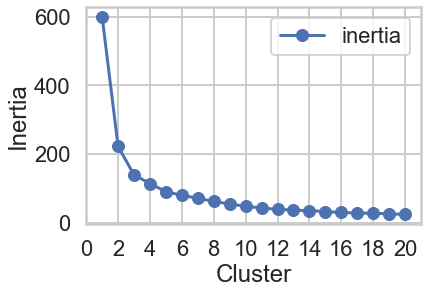

In [352]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [353]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[float_columns])
data['agglom'] = ag.fit_predict(data[float_columns])

In [354]:
#Agglomerative results:
(data[['Species','agglom','kmeans']]
 .groupby(['Species','agglom'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Species agglom        
0       0            1
        1           49
1       0           50
3       0           50

In [355]:
#KMeans results:
(data[['Species','agglom','kmeans']]
 .groupby(['Species','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

,,number
Species,kmeans,
0,0,50
1,1,50
3,1,50


In [357]:
#comparing results:
(data[['Species','agglom','kmeans']]
 .groupby(['Species','agglom','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
Species agglom kmeans        
0       0      0            1
        1      0           49
1       0      1           50
3       0      1           50

In [ ]:
#we can see that they only differ slightly

## Hierarchical clustering

In [ ]:
#Hierarchical clustering

import scipy.cluster.hierarchy as hier

In [ ]:
#initialize clusters 
cluster = AgglomerativeClustering(n_clusters=3)

In [ ]:
#fitting the data
model = cluster.fit(x)
model
pred1 = model.labels_
pred1

In [ ]:
#plotting the hierarchical Cluster

plt.scatter(x[pred1 == 0, 1], x[pred1 == 0, 2], s = 80, c = 'blue', label = 'setosa')
plt.scatter(x[pred1 == 1, 0], x[pred1 == 1, 2], s = 80, c = 'yellow', label = 'versicolour')
plt.scatter(x[pred1 == 2, 0], x[pred1 == 2, 2], s = 80, c = 'red', label = 'virginica')
plt.title('Hierarchical clustering for Iris data')
plt.legend()

In [ ]:
#get accuracy scores
import sklearn.metrics as metric

target = data['Species']

k =3 

#build the model

HCluster = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="ward")

#fit the model on the dataset

HCluster.fit(x)

#accuracy of the model
metric.accuracy_score(target,HClustering.labels_)